### Use the K-nearest neighbors algorithm to predict how many points NBA (National Basketball Association) players scored in the 2013-2014 season.
A look at the data Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
<ol> player - name of the player </ol> 
<ol> pos - the position of the player </ol>
<ol> g - number of games the player was in </ol>
<ol> gs - number of games the player started </ol>
<ol> pts - total points the player scored </ol>
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.

In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [5]:
nba_data = pd.read_csv("nba_2013.csv")
nba_data.head(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [6]:
nba_data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


#### observation - There are missing values

In [7]:
nba_data.shape

(481, 31)

In [8]:
nba_data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [9]:
nba_data.fillna(nba_data.mean(),inplace= True)

In [10]:
nba_data.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [11]:
nba_data.drop(['season_end','season','player'], axis=1,inplace=True)

In [12]:
X_nba_data = nba_data.drop(columns = ['pts'])
y_nba_data = nba_data['pts']

In [13]:
X_nba_data["bref_team_id"].value_counts()


TOT    63
NOP    18
OKC    17
LAC    16
UTA    16
LAL    16
POR    15
DET    15
ATL    15
BRK    15
DAL    15
NYK    15
PHO    15
MIA    15
HOU    15
CLE    14
BOS    14
WAS    14
MIN    14
SAS    14
MEM    13
ORL    13
MIL    13
CHA    13
GSW    12
PHI    12
IND    12
DEN    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64

In [14]:
bref_team_nums = {"bref_team_id": { "TOT":1,"NOP":2,"OKC":3,"UTA":4,"LAL":5,"LAC":6,"NYK":7,"DET":8,"ATL":9,"POR":10,
"MIA":11,"HOU":12,"BRK":13,"PHO":14,"DAL":15,"WAS":16,"MIN":17,"SAS":18,"BOS":19,"CLE":20,"MIL":21,"MEM":22,"CHA":23,"ORL":24,"GSW":25,"IND":26,"PHI":27,"DEN":28,"CHI":29,"TOR":30,"SAC":31}}


In [15]:
X_nba_data["pos"].value_counts()


SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [16]:
pos_nums = {"pos": { "SG":1,"SF":2,"PF":3,"C":4,"PG":5,"F":6,"G":7}}
X_nba_data=X_nba_data.replace(pos_nums)


In [17]:
X_nba_data.head(10)

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,2,23,TOT,63,0,847,66,141,0.468,4,...,53,0.660,72,144,216,28,23,26,30,122
1,4,20,OKC,81,20,1197,93,185,0.503,0,...,136,0.581,142,190,332,43,40,57,71,203
2,3,27,TOT,53,12,961,143,275,0.520,0,...,119,0.639,102,204,306,38,24,36,39,108
3,1,28,ORL,73,73,2552,464,1011,0.459,128,...,336,0.815,32,230,262,248,35,3,146,136
4,4,25,NOP,56,30,951,136,249,0.546,0,...,67,0.836,94,183,277,40,23,46,63,187
5,4,25,NYK,46,2,330,33,61,0.541,0,...,30,0.867,37,92,129,14,8,30,18,40
6,3,28,POR,69,69,2498,652,1423,0.458,3,...,360,0.822,166,599,765,178,63,68,123,147
7,3,24,TOT,65,2,1072,134,300,0.447,2,...,50,0.660,119,192,311,71,24,33,44,126
8,1,38,MIA,73,9,1936,240,543,0.442,116,...,116,0.905,23,182,205,143,54,8,84,115
9,1,32,MEM,55,28,1278,204,413,0.494,11,...,121,0.628,79,129,208,94,90,19,90,121


In [18]:
X_nba_data=X_nba_data.replace(bref_team_nums)
X_nba_data.head(10)

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,2,23,1,63,0,847,66,141,0.468,4,...,53,0.660,72,144,216,28,23,26,30,122
1,4,20,3,81,20,1197,93,185,0.503,0,...,136,0.581,142,190,332,43,40,57,71,203
2,3,27,1,53,12,961,143,275,0.520,0,...,119,0.639,102,204,306,38,24,36,39,108
3,1,28,24,73,73,2552,464,1011,0.459,128,...,336,0.815,32,230,262,248,35,3,146,136
4,4,25,2,56,30,951,136,249,0.546,0,...,67,0.836,94,183,277,40,23,46,63,187
5,4,25,7,46,2,330,33,61,0.541,0,...,30,0.867,37,92,129,14,8,30,18,40
6,3,28,10,69,69,2498,652,1423,0.458,3,...,360,0.822,166,599,765,178,63,68,123,147
7,3,24,1,65,2,1072,134,300,0.447,2,...,50,0.660,119,192,311,71,24,33,44,126
8,1,38,11,73,9,1936,240,543,0.442,116,...,116,0.905,23,182,205,143,54,8,84,115
9,1,32,22,55,28,1278,204,413,0.494,11,...,121,0.628,79,129,208,94,90,19,90,121


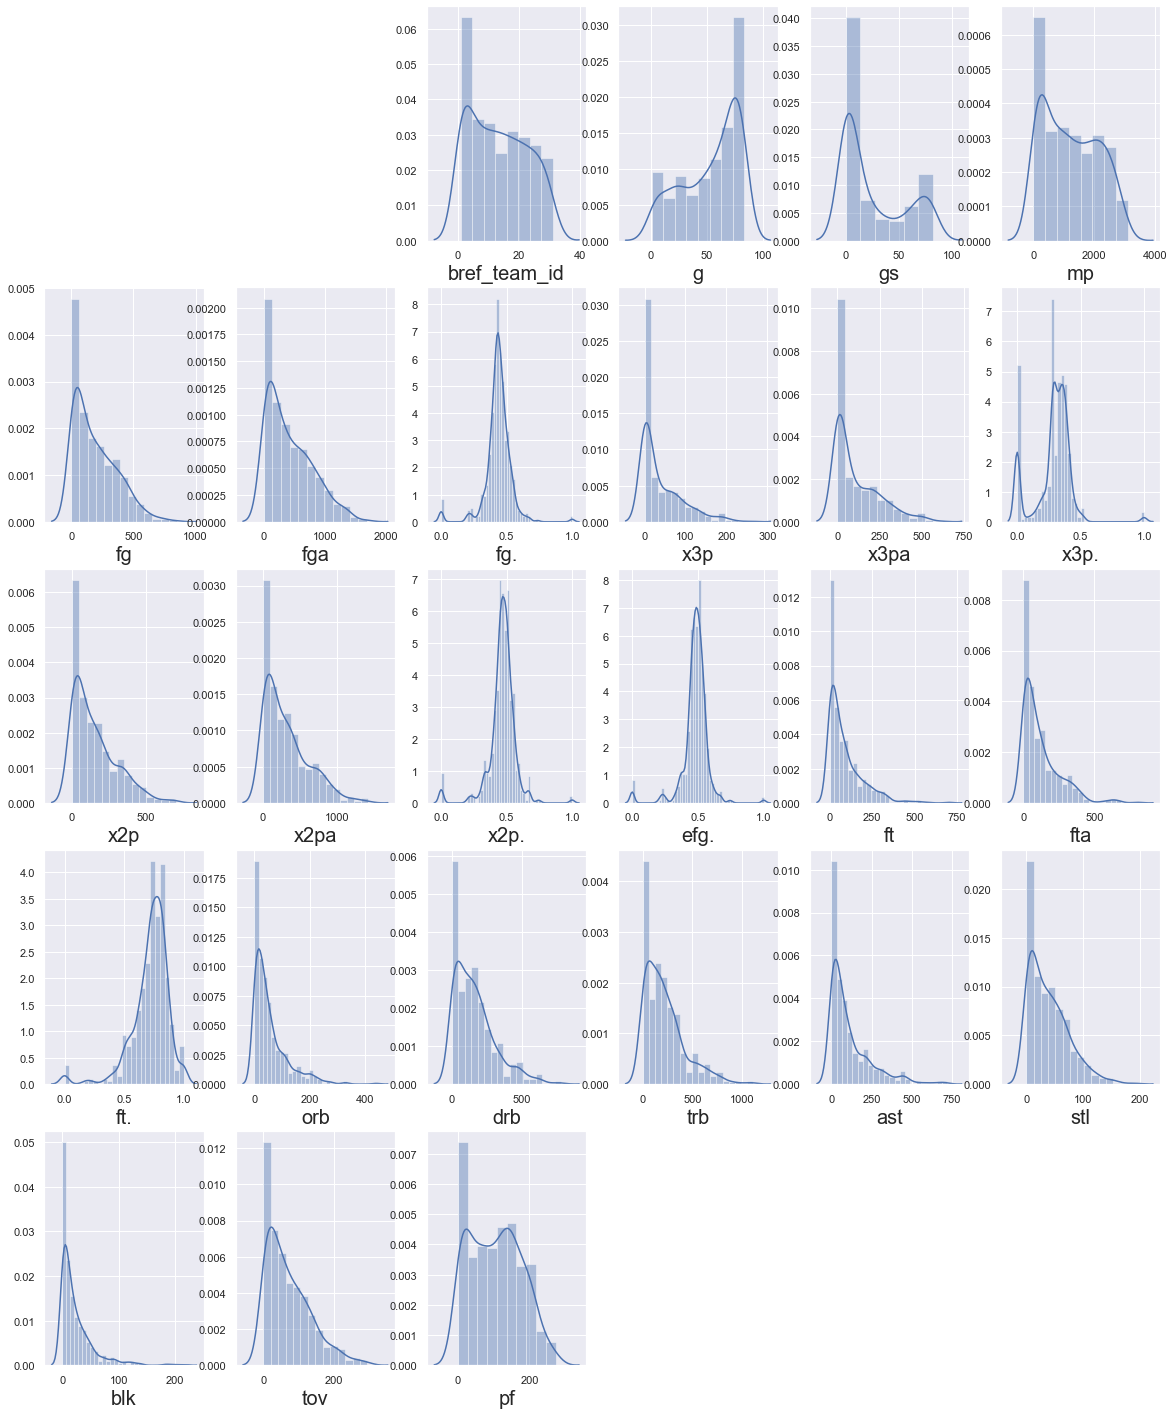

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_nba_data:
    if plotnumber>2 and plotnumber<=29:     # as there are 27 columns in the data
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(X_nba_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

####  observation - Left side skewed graph - We can remove outliers or can normalise the data

<AxesSubplot:>

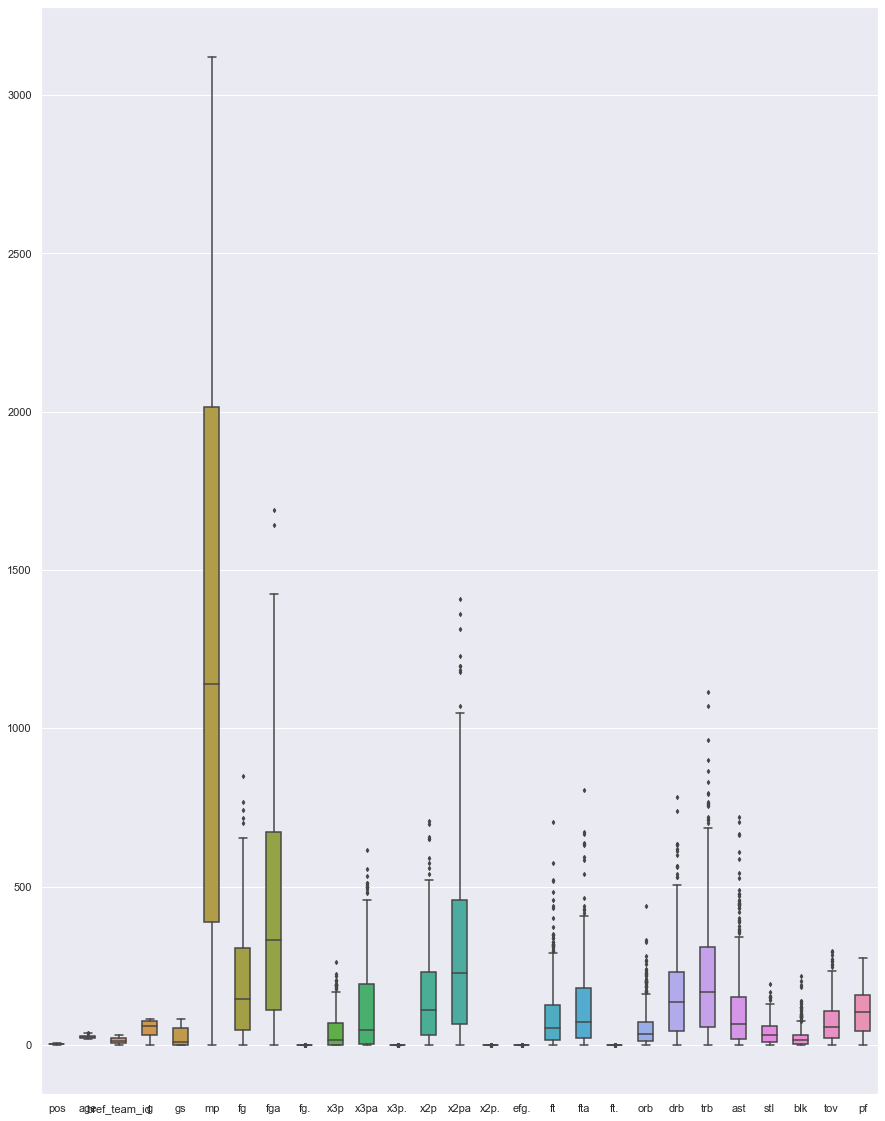

In [20]:

fig, ax = plt.subplots(figsize=(15,20))
sns.boxplot(data=X_nba_data, width= 0.50,ax=ax,  fliersize=3)


q = nba_data['x2p'].quantile(0.98)
### we are removing the top 2% data from the x2p column
data_cleaned = nba_data[nba_data['']<q]
q = data_cleaned['BMI'].quantile(0.99)
### we are removing the top 1% data from the fga column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
### we are removing the top 1% data from the x3p column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
### we are removing the top 5% data from the x3pa column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
### we are removing the top 1% data from the x2pa column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
### we are removing the top 1% data from the ft column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]
### we are removing the top 1% data from the drb column
### we are removing the top 1% data from the trb column
### we are removing the top 1% data from the ast column
### we are removing the top 1% data from the blk column
### we are removing the top 1% data from the stl column
### we are removing the top 1% data from the tov column
### we are removing the top 1% data from the pts column

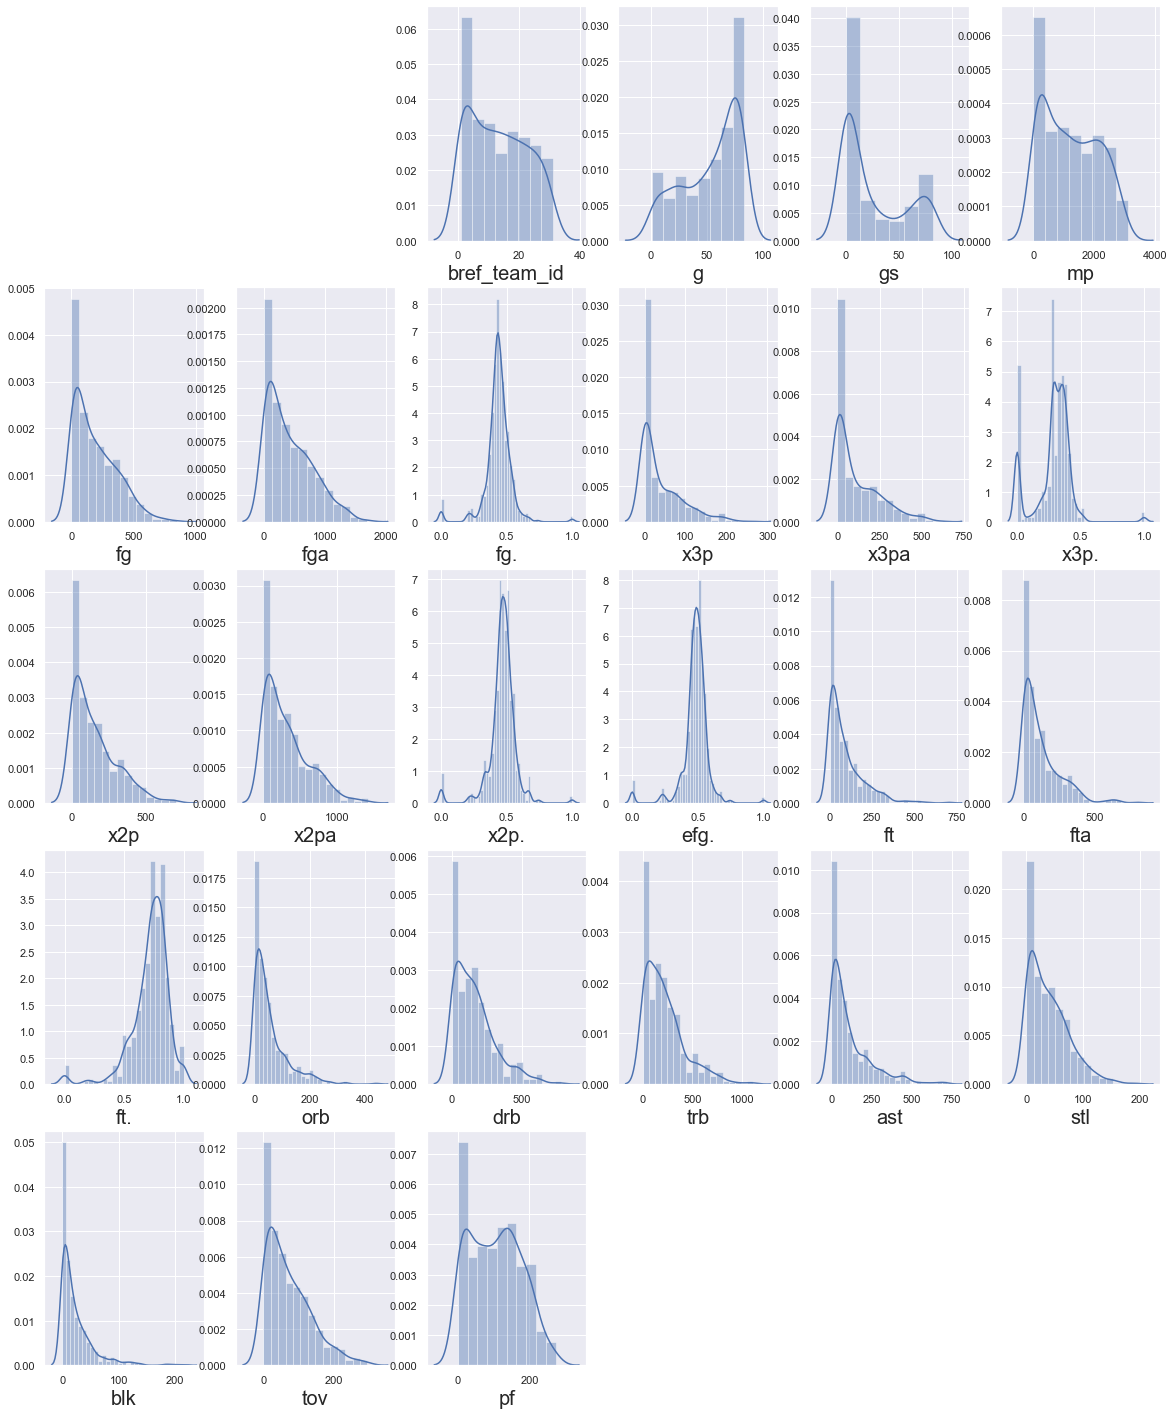

In [21]:
# after removing outliers ,# let's see how data is distributed for every column
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_nba_data:
    if plotnumber>2 and plotnumber<=29:     # as there are 27 columns in the data
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(X_nba_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

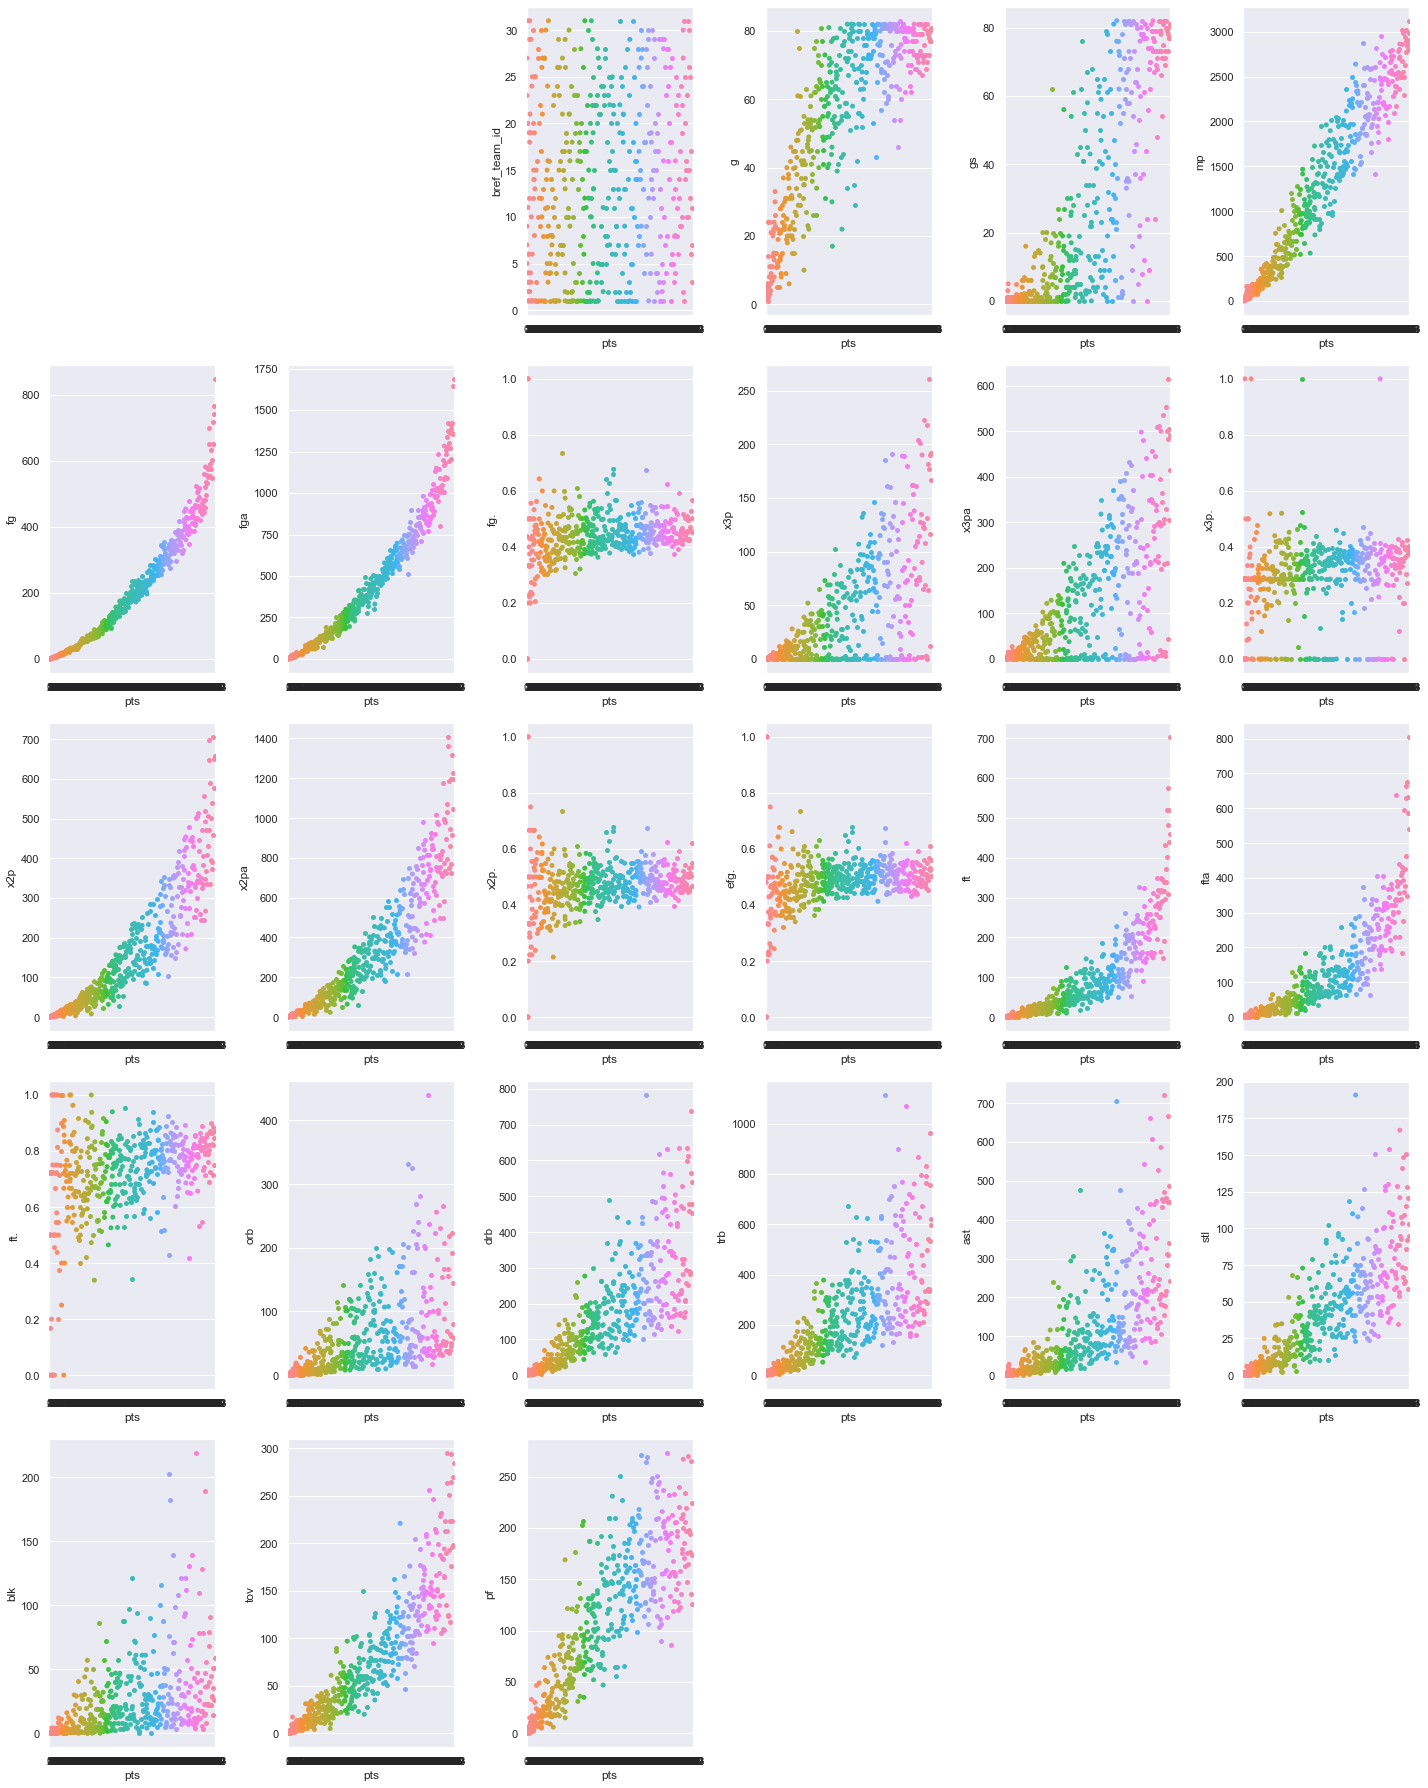

In [22]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_nba_data:
    if plotnumber>2 and plotnumber<=29:     # as there are 27 columns in the data
        ax = plt.subplot(5,6,plotnumber)
        sns.stripplot(y_nba_data,X_nba_data[column])
    plotnumber+=1
plt.tight_layout()

In [30]:
#Great!! Let's proceed by checking multicollinearity in the dependent variables.
#Before that, we should scale our data. Let's use the standard scaler for that.

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_nba_data)

In [31]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X_nba_data.columns

#let's check the values
vif

C:\Users\Sachin Narang\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
0,1.445926,pos
1,1.133004,age
2,1.054343,bref_team_id
3,7.957248,g
4,6.182555,gs
5,44.591002,mp
6,inf,fg
7,inf,fga
8,20.833083,fg.
9,inf,x3p


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_nba_data, test_size= 0.25)

In [33]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [34]:
y_pred = knn.predict(x_test)

In [35]:
knn.score(x_train,y_train)

0.9704292909854416

In [ ]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

In [37]:
#Let's try to increase the accuracy by using hyperparameter tuning


param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }



In [38]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [39]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.956, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.947, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.958, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.947, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.958, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.958, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.936, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.968, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.960, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.956, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.958, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.935, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.927, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.969, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.962, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.958, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=10, score=0.936, total

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.958, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.947, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.968, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.962, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.937, total= 

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.962, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.958, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.936, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.968, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.960, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.956, t

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.956, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.938, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.947, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.958, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.947, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.958, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.946, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.934, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.918, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.962, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.948, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.956, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.938, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.947, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.923, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.962, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.950, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.952, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.934, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.918, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.962, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.937, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.927, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.966, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.955, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.954, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.938, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.923, total=   0.0s


[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.966, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.955, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.954, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.938, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.923, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.962, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.950, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.960, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.956, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.937, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.927, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.966, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.955, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.954, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.930, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.968, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.960, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.956, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.937, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.927, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.966, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.966, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.955, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.954, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.938, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.923, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.962, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.950, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    5.6s finished


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [40]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [41]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =5)

In [42]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18)

In [43]:
knn.score(x_train,y_train)

0.9704292909854416

In [44]:
# Looks like accuracy for training is same , no model was overfitting the data before. Let's see how it perfroms on the test data.

In [45]:
knn.score(x_test,y_test)

0.9622981196001268

In [46]:
#Great, accuracy score has increased for our test data. So, indeed our model was overfitting before. Now, it looks better.

#Let's now use k-fold cross validation and check how well our model is generalizing over our dataset: We are randomly selecting our k to be 12 for k fold.


In [47]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

C:\Users\Sachin Narang\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


12

In [48]:
from statistics import mean
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =5)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y_nba_data.iloc[train_index], y_nba_data.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9723669987092183 and test score is :   0.9544179796853833
for k =  2
train_score is :   0.9755218925654695 and test score is :   0.9639135549677125
for k =  3
train_score is :   0.9747094227027995 and test score is :   0.9561404709559596
for k =  4
train_score is :   0.9751887688341146 and test score is :   0.9418728996464534
for k =  5
train_score is :   0.9738433528799528 and test score is :   0.9788363611311124
for k =  6
train_score is :   0.9729469458412252 and test score is :   0.9619994939383246
for k =  7
train_score is :   0.9738840582975999 and test score is :   0.9560138519384542
for k =  8
train_score is :   0.9753385597478644 and test score is :   0.9639587017719812
for k =  9
train_score is :   0.9757455746855002 and test score is :   0.9571768045300312
for k =  10
train_score is :   0.974875564430317 and test score is :   0.9204223255248227
for k =  11
train_score is :   0.9735959001610098 and test score is :   0.9761262500229129
for k =  

([<matplotlib.axis.YTick at 0xc3b7888>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

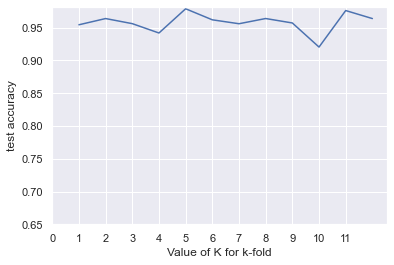

In [49]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

Average train score is :   0.974402607114478
Average test score is :   0.9578982841851097


Our cross validation tells that on an avergae our model has a 96% accuracy on our test data. so, that's how we can use cross validation to compute how well our model is generalizing on our data.

We can also use cross valdition score to opt between different models or to do hyperparameter tuning.
